In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("dataset_lr.xlsx")
df.head()

,месяц,год,Средний вес поезда,Ср сут пробег,Ср сут производ-сть,Участковая скорость,Техническая скорость,Следование резервом,Грузооборот,Общий пробег,Вспомогательный пробег,Рабочий парк
0,1,2014,4027.789098,641.960404,1856.454766,43.490513,48.650967,46.806034,1.752266e+07,6468934.502,1394763.702,304.476691
1,2,2014,3990.677837,626.769432,1851.758001,42.398022,48.033059,44.161943,1.705135e+07,6140064.462,1150773.482,328.864210
2,3,2014,3975.466383,612.606054,1803.552082,41.240079,47.262731,43.586246,1.892131e+07,6862058.505,1244170.025,338.423825
3,4,2014,3938.356174,599.205064,1780.019054,40.198248,46.623835,39.842432,1.845964e+07,6647757.413,1119267.113,345.682531
4,5,2014,3914.920860,592.566632,1754.171330,39.482134,45.995732,39.464017,1.832765e+07,6658906.510,1167675.180,337.033450


#### Зависимой здесь  является переменная «Рабочий парк».

# Изучим характеристики набора данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   месяц                   60 non-null     int64  
 1   год                     60 non-null     int64  
 2   Средний вес поезда      60 non-null     float64
 3   Ср сут  пробег          60 non-null     float64
 4   Ср сут  производ-сть    60 non-null     float64
 5   Участковая скорость     60 non-null     float64
 6   Техническая скорость    60 non-null     float64
 7   Следование резервом     60 non-null     float64
 8   Грузооборот             60 non-null     float64
 9   Общий пробег            60 non-null     float64
 10  Вспомогательный пробег  60 non-null     float64
 11  Рабочий парк            60 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 5.8 KB


In [4]:
df.describe()

,месяц,год,Средний вес поезда,Ср сут пробег,Ср сут производ-сть,Участковая скорость,Техническая скорость,Следование резервом,Грузооборот,Общий пробег,Вспомогательный пробег,Рабочий парк
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000
mean,6.500000,2016.000000,3997.211421,611.878966,1844.309456,40.042498,45.220085,39.775652,1.799936e+07,6.440870e+06,1.173847e+06,321.730093
std,3.481184,1.426148,43.133927,30.713711,84.961605,2.761971,1.805134,3.372028,1.227346e+06,4.195539e+05,1.019157e+05,29.417297
min,1.000000,2014.000000,3907.499131,523.881062,1609.969608,32.790784,40.450633,34.220421,1.446510e+07,5.402079e+06,9.724066e+05,245.361109
25%,3.750000,2015.000000,3968.223697,598.803824,1798.377986,38.600381,44.201759,36.911014,1.728183e+07,6.146967e+06,1.101551e+06,304.183895
50%,6.500000,2016.000000,3998.246772,613.935739,1868.376552,40.164294,45.464114,39.841182,1.804833e+07,6.452955e+06,1.170902e+06,318.274013
75%,9.250000,2017.000000,4027.038922,627.928180,1900.589972,41.595073,46.196432,41.435805,1.886082e+07,6.732581e+06,1.232337e+06,343.304300
max,12.000000,2018.000000,4092.622170,666.313617,1978.610676,45.361862,48.650967,49.481372,2.009155e+07,7.183995e+06,1.433932e+06,384.711458


In [5]:
df.fillna(0, inplace=True) # На всякий случай выполним заполнение нулями ячеек с пропусками.

In [6]:
df.columns

Index(['месяц', 'год', 'Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк'],
      dtype='object')

<AxesSubplot:>

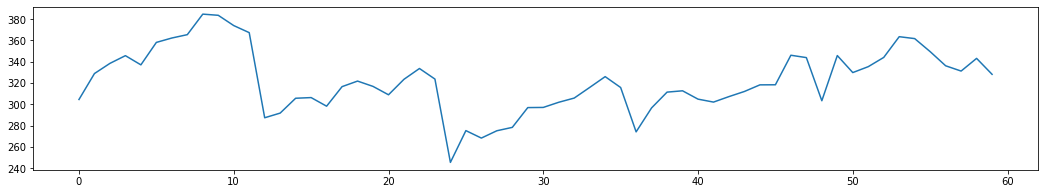

In [7]:
df['Рабочий парк'].plot(figsize=(18,3))

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Рабочий парк', ylabel='Density'>

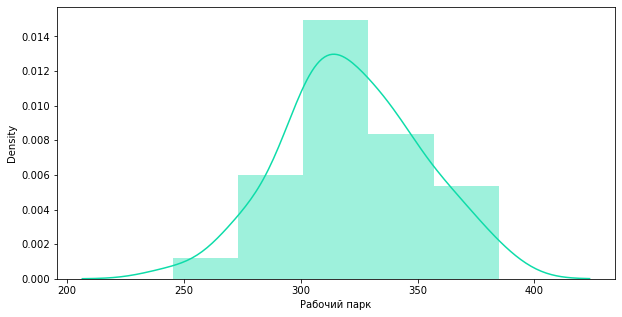

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(df['Рабочий парк'], color='#0EDCA9', hist_kws={'alpha':0.4}, bins=5)

### Отбор переменных для спецификации модели. Корреляционный анализ

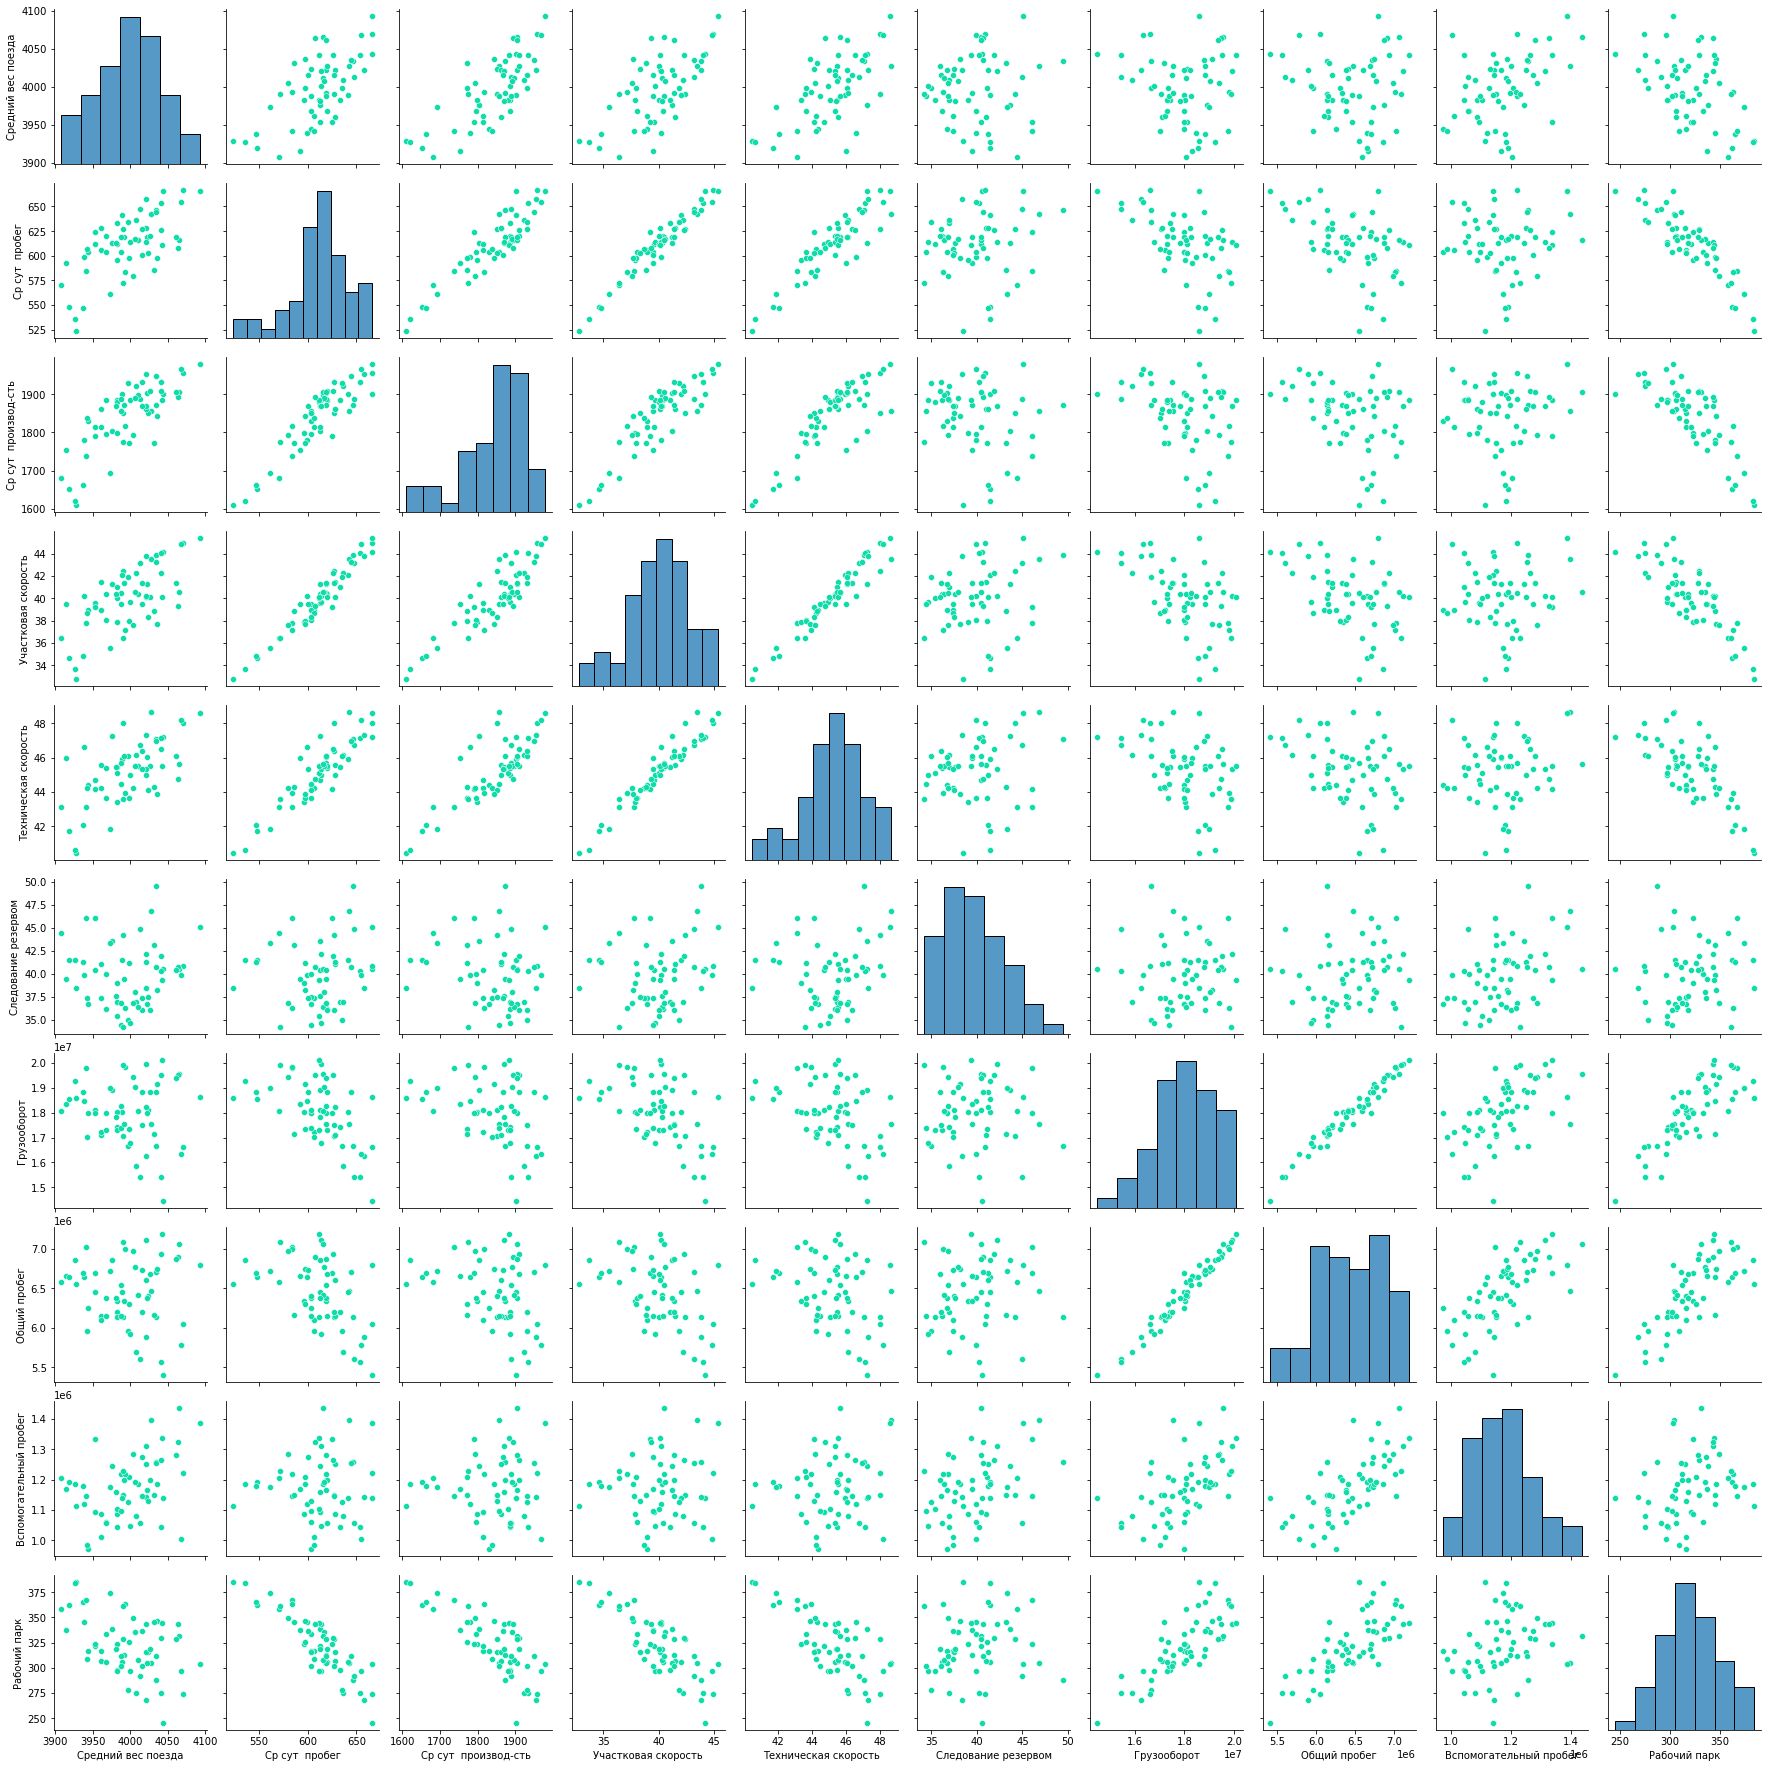

In [9]:
sns.pairplot(df[['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк']], plot_kws={'color':'#0EDCA9'})

In [10]:
from pandas.plotting import scatter_matrix

In [11]:
def h_map(data, level):
    corr = data.corr()
    plt.figure(figsize=(14, 14))
    sns.heatmap(corr[(corr >= level) | (corr <= -level)],
            cmap="RdBu_r", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
    plt.show()

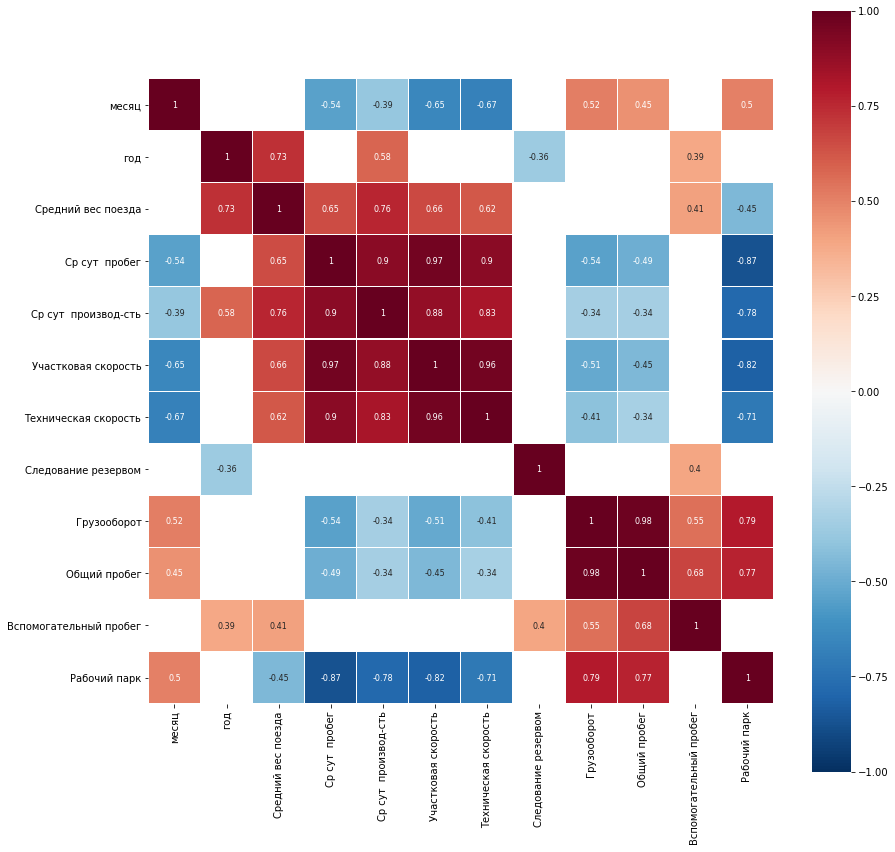

In [12]:
h_map(df, 0.3)

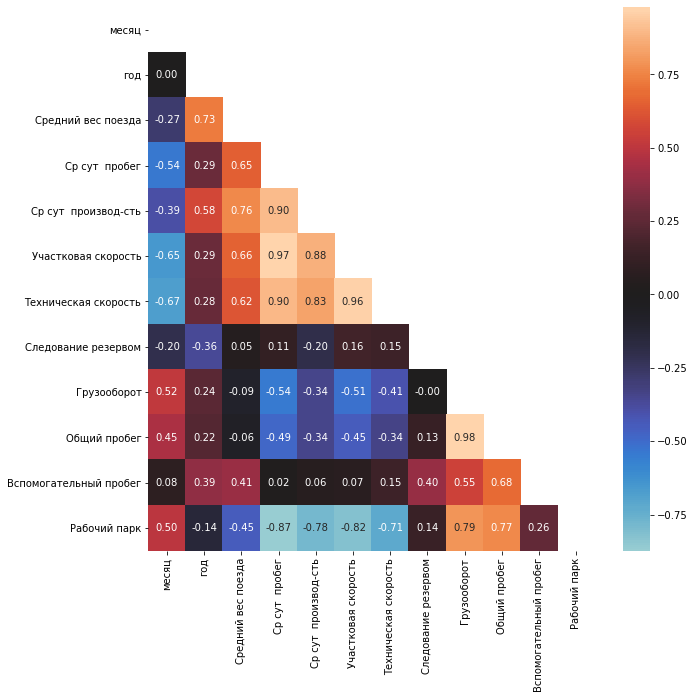

In [13]:
plt.figure(figsize=(10,10))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=True, center=0);

<Figure size 1008x1008 with 0 Axes>

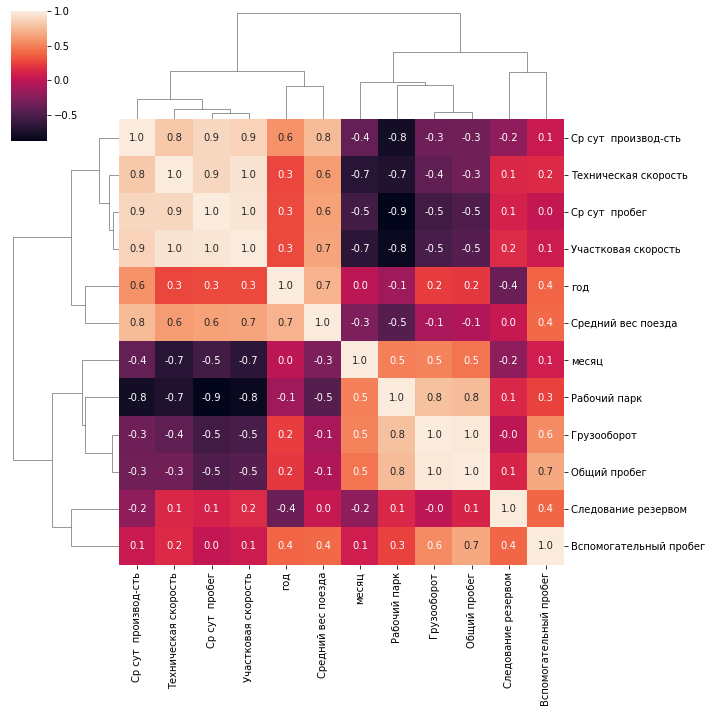

In [14]:
plt.figure(figsize=(14,14))
sns.clustermap(df.corr(), annot=True, fmt='.1f')

<Figure size 1008x1008 with 0 Axes>

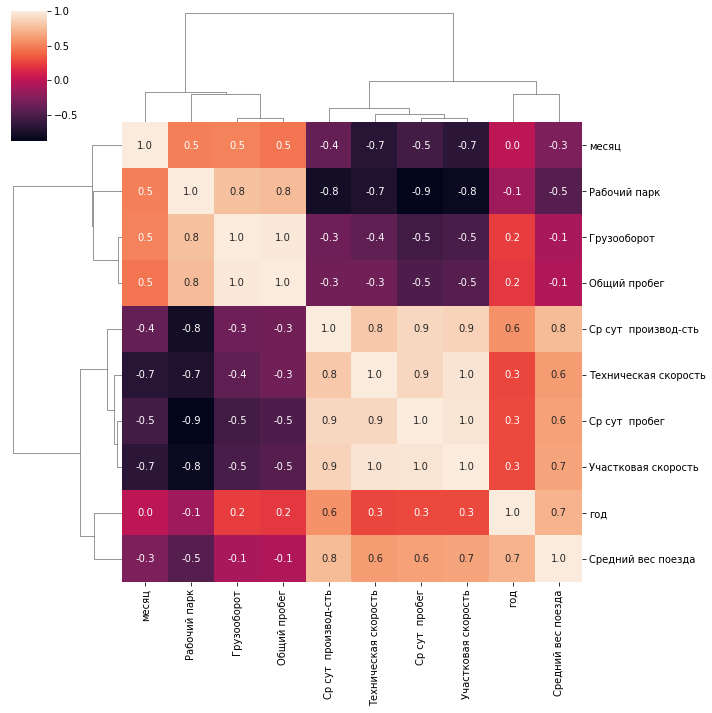

In [15]:
# тепловая карта для заданных колонок
cols = ['месяц', 'год', 'Средний вес поезда', 'Ср сут  пробег','Ср сут  производ-сть', 'Участковая скорость', 
        'Техническая скорость', 'Грузооборот', 'Общий пробег', 'Рабочий парк']
plt.figure(figsize=(14,14))
sns.clustermap(df[cols].corr(), annot=True, fmt='.1f')

[для дополнительного изучения тепловых карт] https://seaborn.pydata.org/generated/seaborn.clustermap.html

### Разделим переменные на зависимую и предикторы

In [16]:
col=['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег']
#Разделим на предикторы (col) и зависиму переменную (Y)
X=df[col]
Y=df['Рабочий парк']

# Построение модели множественной регрессии на временных рядах

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.04e-36
Time:                        15:09:27   Log-Likelihood:                -177.27
No. Observations:                  60   AIC:                             374.5
Df Residuals:                      50   BIC:                             395.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -195

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


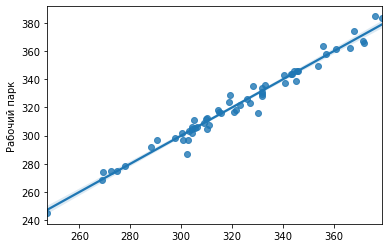

In [17]:
import statsmodels.api as sm # импортируется библиотека statsmodels
X=sm.add_constant(X)

reg = sm.OLS(Y, X) # исрользуется метод OLS (метод наименьших квадратов)
res=reg.fit()
print(res.summary())
r=res.predict(X)
r=np.array(res)
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

[полезная ссылка для более детального изучения мн. регресии] https://nagornyy.me/en/it/regressionnye-modeli-v-python/

## Выполним подбор регрессоров, при которых будут минимальная мультиколлинеарность и высокая точность. 

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
#import itertools
from itertools import compress, product

In [20]:
def combinations(items):
    return list( set(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )

In [21]:
def get_factors(data, Y, columns):

    # колонки, которые показали свою значимость в процессе отбора критериев
    # переменная spisCol хранит варианты комбинаций все переменных
    spisCol=combinations(columns)

    print('Количество комбинаций ', len(spisCol))
    
    #добавим константу в набор данных, нужна для рассчета регрессии
    data=sm.add_constant(data)

    #сохраним в этом списке данные лучших моделей
    arr_res=[]

    #пробежимся циклом по всем вариантам комбинаций
    for c in spisCol:
        perem=list(c)
        flag=True
    
        if len(perem)==0: continue
        
        if not('const' in c):
            perem.append('const')
        
        # если больше одного клитерия, рассчитаем VIF    
        if len(perem)>1:
            vif = [variance_inflation_factor(data[perem].values, i) for i in range(data[perem].shape[1])]
        else:
            vif=[]
    
        #проверим список VIF, если хоть одна переменная больше 1000 (очень большое значение, на самом деле),
        #то в модели присутсвует мультиколлинераность
        for vv in vif:
            if vv>1000: 
                flag=False
        
        #посчитаем саму модель
        reg = sm.OLS(Y, data[perem])
        res=reg.fit()

        #отбросим нулевую гипотезу для всех регрессоров конкретной модели
        for val in res.tvalues:
            if val<2 and val>-2:
                flag=False
                break
        for val in res.pvalues:
            if val>0.05:
                flag=False
                break
        #если нулевую гипотезу отбросили и VIF в норме, сохраним результаты
        if flag:
            re=np.array(res.fittedvalues.copy())
            MSE=((np.array(Y)-re)**2).sum()/len(re)
            
            MAPE=(abs((np.array(Y)-re)/np.array(Y))).sum()/len(re)
        
            arr_res.append([round(MSE,4), res.rsquared, perem])

    #отсортируем и выведем результаты
    arr_res.sort()
    df_model=pd.DataFrame(arr_res, columns=['MSE', 'r2', 'Переменные'])
    print('Результаты перебора в порядке возрастания MSE:')
    print(df_model)
    return df_model

In [22]:
res=get_factors(df, Y, col)

Количество комбинаций  512
Результаты перебора в порядке возрастания MSE:
         MSE        r2                                         Переменные
0    71.1899  0.916341  [Грузооборот, Следование резервом, Участковая ...
1    81.3011  0.904459  [Общий пробег, Следование резервом, Участковая...
2   102.7088  0.879302  [Ср сут  пробег, Ср сут  производ-сть, Следова...
3   108.9930  0.871917         [Общий пробег, Участковая скорость, const]
4   118.4978  0.860747          [Грузооборот, Участковая скорость, const]
5   119.4214  0.859662  [Ср сут  пробег, Следование резервом, Вспомога...
6   135.1980  0.841122    [Ср сут  пробег, Вспомогательный пробег, const]
7   139.1183  0.836515  [Ср сут  пробег, Следование резервом, Техничес...
8   155.2335  0.817577       [Ср сут  пробег, Следование резервом, const]
9   169.9866  0.800240  [Вспомогательный пробег, Следование резервом, ...
10  178.9255  0.789736  [Вспомогательный пробег, Ср сут  производ-сть,...
11  180.1576  0.788288      [Ср сут  п

In [23]:
res.loc[0][2]

['Грузооборот', 'Следование резервом', 'Участковая скорость', 'const']

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     204.5
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           3.92e-30
Time:                        15:09:29   Log-Likelihood:                -213.10
No. Observations:                  60   AIC:                             434.2
Df Residuals:                      56   BIC:                             442.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Следование резервом     2.0957    

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


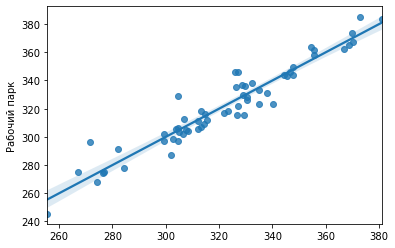

In [24]:
Y=df['Рабочий парк']
df=sm.add_constant(df)
#укажем пермеенные, которые будем использовать в качестве регрессоров
X=df[['Следование резервом', 'Грузооборот', 'Участковая скорость', 'const']]
reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

In [25]:
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    print("Тест на стационарность:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значение = {:.3f}".format(dftest[1]))
    print("Критические значения :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Данные {} стационарны с вероятностью {}% процентов".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))
    
    #real=np.array(real[real.columns[0]].values)
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартная ошибка:', round(((real-forecast)**2).mean()**0.5,4)) 

In [26]:
metrics(df['Рабочий парк'], res.fittedvalues)

Тест на стационарность:
	T-статистика = -1.344
	P-значение = 0.609
Критические значения :
	1%: -3.5745892596209488 - Данные не стационарны с вероятностью 99% процентов
	5%: -2.9239543084490744 - Данные не стационарны с вероятностью 95% процентов
	10%: -2.6000391840277777 - Данные не стационарны с вероятностью 90% процентов
MAD: 6.3904
MSE: 71.1899
MAPE: 0.0201
MPE: -0.0007
Стандартная ошибка: 8.4374


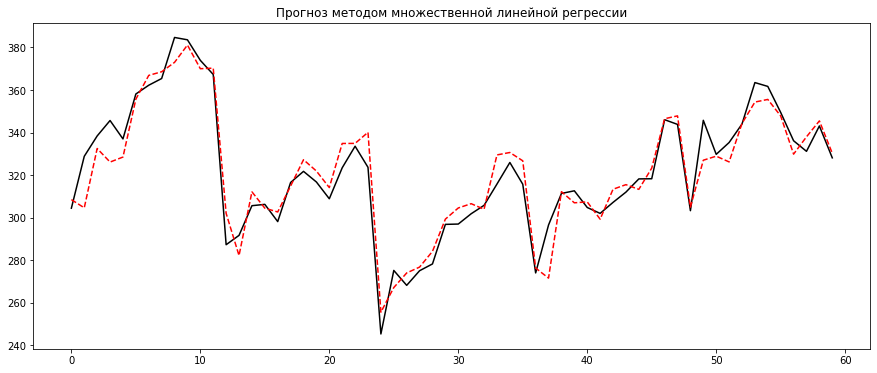

In [27]:
ax = df['Рабочий парк'].plot(figsize=(15,6), color='black', title="Прогноз методом множественной линейной регрессии" )
res.fittedvalues.plot(ax=ax, style='--', color='red')
plt.show()

# Реализация метода Монте-Карло

In [28]:
size = 1000 # Задано количество экспериментов

#### Порсмотрим на вид распределения регрессоров (предикторов)

<AxesSubplot:>

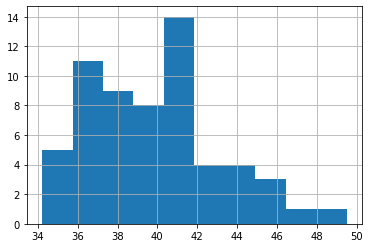

In [29]:
df['Следование резервом'].hist()

<AxesSubplot:>

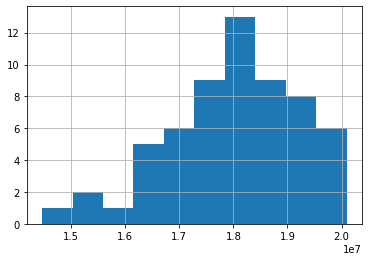

In [30]:
df['Грузооборот'].hist()

<AxesSubplot:>

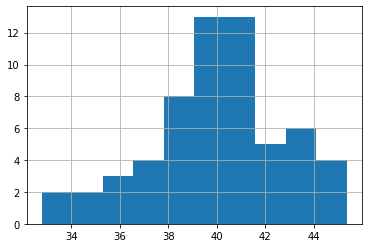

In [31]:
df['Участковая скорость'].hist()

<font size=3> Вывод: Регрессоры «Следование резервом» и «Грузооборот» имеют скорее треугольные распределения, а регрессор «Участковая скорость» - нормальное распределение.</font>

#### Выедем характеристики предикторов, так как некоторые из них понадобятся дальше для генерации случайных чисел

In [32]:
df[['Следование резервом', 'Грузооборот', 'Участковая скорость']].describe()

,Следование резервом,Грузооборот,Участковая скорость
count,60.000000,6.000000e+01,60.000000
mean,39.775652,1.799936e+07,40.042498
std,3.372028,1.227346e+06,2.761971
min,34.220421,1.446510e+07,32.790784
25%,36.911014,1.728183e+07,38.600381
50%,39.841182,1.804833e+07,40.164294
75%,41.435805,1.886082e+07,41.595073
max,49.481372,2.009155e+07,45.361862


In [33]:
df[['Следование резервом', 'Грузооборот']].median() # вместо среднего арифметического лучше брать медиану или моду

Следование резервом    3.984118e+01
Грузооборот            1.804833e+07
dtype: float64

(array([ 40.,  86., 151., 177., 149., 135.,  90., 104.,  53.,  15.]),
 array([34.15594001, 35.68283017, 37.20972033, 38.73661049, 40.26350065,
        41.7903908 , 43.31728096, 44.84417112, 46.37106128, 47.89795144,
        49.4248416 ]),
 <BarContainer object of 10 artists>)

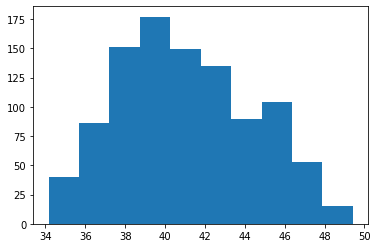

In [34]:
reserv = np.random.triangular(left = 34, mode = 39, right = 50, size = size)
plt.hist(reserv)

In [35]:
reserv

array([36.49202987, 36.32155407, 43.97388262, 45.82519997, 42.15148271,
       42.12792157, 40.93225584, 45.49247066, 40.07176849, 43.45627545,
       38.39278081, 37.27403876, 48.88591489, 38.24857389, 35.74086995,
       40.75906216, 40.72626182, 41.61368287, 38.29020048, 37.76189445,
       38.70190114, 47.1006264 , 41.98260534, 45.79893345, 41.88011866,
       39.68249333, 44.32187679, 46.04051825, 47.87986179, 36.82873584,
       38.79765332, 38.52065538, 35.48556752, 41.33533782, 35.2627101 ,
       44.42753701, 45.42044542, 44.6515501 , 41.09874635, 36.50854834,
       41.19845646, 40.53946447, 38.64092306, 42.77859421, 48.97544266,
       43.96369466, 46.05644041, 37.13522369, 39.11301445, 39.27639344,
       36.42139182, 42.70897016, 39.34204862, 45.00273002, 44.21652654,
       40.10585157, 35.89663721, 41.27627775, 46.22614916, 44.22252401,
       39.59687624, 38.7320952 , 41.92069663, 35.42476413, 45.64532579,
       37.90860486, 38.41093881, 41.11419679, 48.4512413 , 44.65

(array([ 26.,  56.,  72., 104., 141., 151., 204., 145.,  79.,  22.]),
 array([14642995.88802602, 15170759.71162695, 15698523.53522789,
        16226287.35882883, 16754051.18242976, 17281815.0060307 ,
        17809578.82963163, 18337342.65323257, 18865106.47683351,
        19392870.30043444, 19920634.12403538]),
 <BarContainer object of 10 artists>)

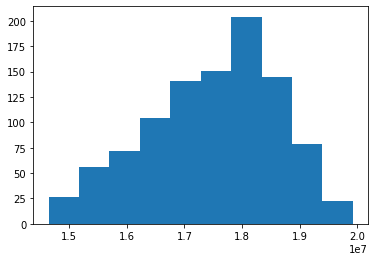

In [36]:
gruz = np.random.triangular(left = 1.446510e+07, mode = 1.799936e+07, right = 2.009155e+07, size = size)
plt.hist(gruz)

(array([ 12.,  42., 109., 229., 230., 204., 111.,  49.,  12.,   2.]),
 array([32.3652723 , 34.05807238, 35.75087247, 37.44367255, 39.13647263,
        40.82927272, 42.5220728 , 44.21487289, 45.90767297, 47.60047305,
        49.29327314]),
 <BarContainer object of 10 artists>)

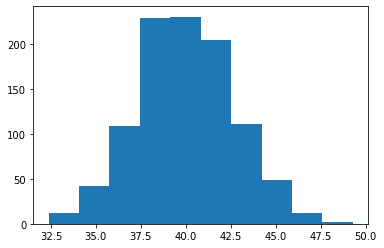

In [37]:
speed = np.random.normal(loc = 40.0, scale = 2.76, size = size)
plt.hist(speed)

<font size=3> Переменные reserve, gruz, speed хранят таблицы (списки) с результатами 1000 случайных экспериментов. Нам остается только подставить их вместо переменных в нашем уравнении регрессии, чтобы получить в результате количество локомотивов, которое потребовалось.</font>

In [38]:
lok=2.0957*reserv+1.151e-05*gruz-6.5204*speed+292

In [39]:
lok

array([311.31458928, 320.64784046, 323.14444047, 358.47747636,
       276.57135084, 282.91417018, 315.50656437, 342.91752522,
       326.22894147, 330.35174282, 335.35195532, 363.73660994,
       345.35244007, 309.71644161, 301.73701577, 348.30685595,
       327.8404947 , 336.79694063, 361.4742283 , 308.76074093,
       306.13930423, 345.08150352, 289.70053499, 302.98937254,
       304.48430818, 268.12678263, 335.98922272, 325.42018998,
       342.41379647, 345.20216281, 303.123287  , 312.23614922,
       322.34901976, 324.82953113, 301.27668918, 306.92875022,
       314.10746009, 316.89565627, 305.96939938, 330.48806921,
       294.40717927, 305.05575186, 296.73727601, 320.70765107,
       320.80212006, 333.61543057, 316.77227696, 310.84471581,
       314.63678574, 326.08635972, 270.5038051 , 327.19935731,
       342.06721955, 299.87553453, 334.15380793, 315.46825231,
       323.95938009, 316.27059568, 278.43715646, 324.82907743,
       297.74846752, 290.51780084, 317.35153027, 314.28

<font size=3> Посмотрим распределение случаев по количеству локомотивов. </font>

(array([  2.,   1.,   8.,   9.,  29.,  18.,  45.,  86., 115., 118., 128.,
        130., 113.,  76.,  57.,  32.,  19.,   8.,   4.,   2.]),
 array([240.27662008, 247.74316831, 255.20971653, 262.67626475,
        270.14281298, 277.6093612 , 285.07590942, 292.54245765,
        300.00900587, 307.47555409, 314.94210232, 322.40865054,
        329.87519876, 337.34174698, 344.80829521, 352.27484343,
        359.74139165, 367.20793988, 374.6744881 , 382.14103632,
        389.60758455]),
 <BarContainer object of 20 artists>)

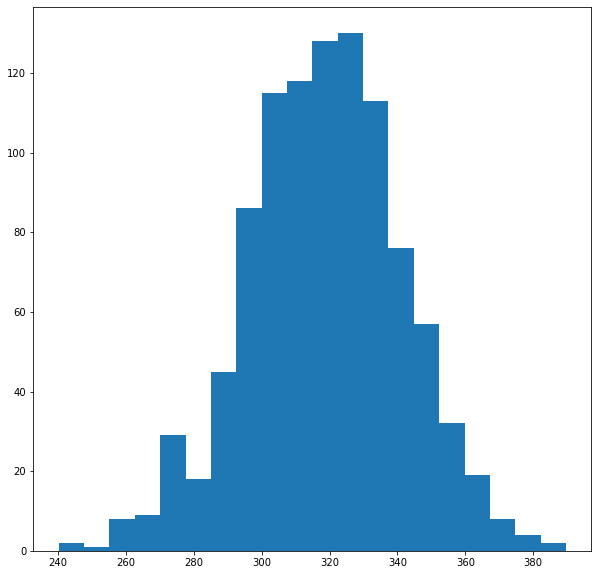

In [40]:
plt.figure(figsize=(10,10))
plt.hist(lok, bins=20)

<font size=3> Наиболее часто требуется около 325 локомотивов. Можем провести моделирование, сколько локомотивов нам оптимально содержать. </font>

In [41]:
np.count_nonzero((340-lok)<0)

178

<font size=3> В этом количестве случаев из 1000 случаев не хватит локомотивов. </font>

In [42]:
np.count_nonzero((380-lok)<0)

3

Вывод: Если в депо будет 380 локомотивов, то только в этом количестве случаев из 1000 экспериментов депо не сможет обеспечить спрос.